In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.metrics import confusion_matrix

In [16]:
df

,Path,Label,loss,predicted,true_label,logits_cat,logits_dog
7597,PetImages/Cat/5586.jpg,Cat,0.027675,0,0,0.972704,0.027296
1118,PetImages/Dog/11002.jpg,Dog,0.001325,1,1,0.001324,0.998676
12138,PetImages/Dog/9673.jpg,Dog,0.335999,1,1,0.285376,0.714624
2828,PetImages/Cat/1293.jpg,Cat,0.328572,0,0,0.719951,0.280049
4089,PetImages/Cat/2428.jpg,Cat,1.279727,1,0,0.278113,0.721887
...,...,...,...,...,...,...,...
9602,PetImages/Cat/7390.jpg,Cat,3.858091,1,0,0.021108,0.978892
4008,PetImages/Cat/2355.jpg,Cat,5.958684,1,0,0.002583,0.997417
2888,PetImages/Dog/1347.jpg,Dog,0.022699,1,1,0.022443,0.977557
5773,PetImages/Dog/3944.jpg,Dog,0.000573,1,1,0.000573,0.999427


In [19]:
df = pd.concat([
    pd.read_csv("csvs/first_half_worst.csv", index_col= 0),
    # pd.read_csv("csvs/second_half_worst.csv", index_col= 0),
])

df["Prediction"] = df.predicted.map({0:"Cat", 1:"Dog"})
df['Validate'] =  df.true_label.map({0:"Cat", 1:"Dog"})
(df.Validate == df.Label).all()

True

In [20]:

df.to_csv("csvs/worst.csv")



def visulize_img(row):
    
    img = plt.imread(row.Path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Label: {row.Label}, Pred: {row.Prediction}, Loss: {float(row.loss) :.2f}")
    plt.tight_layout()
    plt.show()


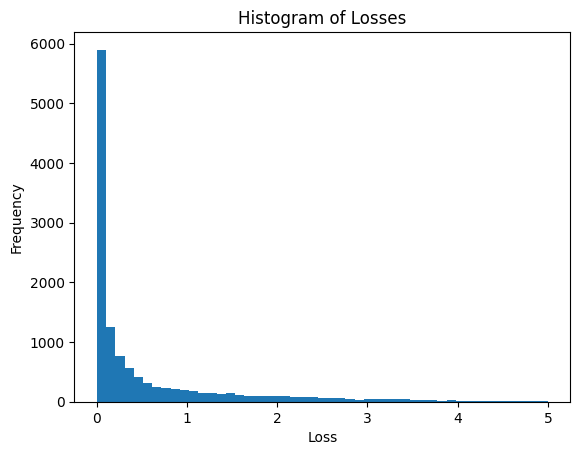

In [21]:
bins = np.linspace(0, 5, 50)  # 50 bins between 0 and 5, but you can adjust the number as desired

df.loss.plot.hist(bins=bins)
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.title('Histogram of Losses')
plt.show()

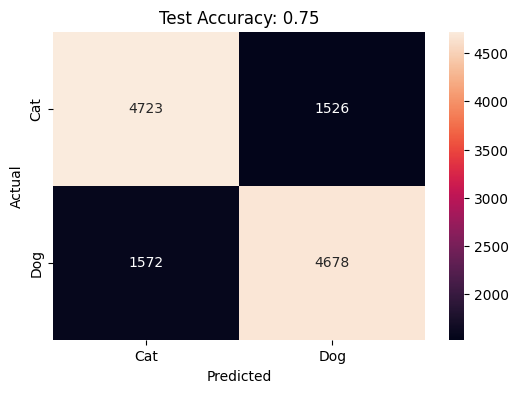

In [22]:
cm = confusion_matrix(df['Label'], df['Prediction'])

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])

test_acc = float((df.Prediction == df.Label).mean())

plt.title(f"Test Accuracy: {test_acc:.2f}")


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
df.sort_values("loss")

,Path,Label,loss,pred_true,Prediction
5249,PetImages/Dog/3472.jpg,Dog,-0.000000e+00,1,Dog
7305,PetImages/Dog/5322.jpg,Dog,2.384185e-07,1,Dog
5191,PetImages/Dog/342.jpg,Dog,4.768370e-07,1,Dog
3315,PetImages/Dog/1731.jpg,Dog,1.907347e-06,1,Dog
3350,PetImages/Dog/1763.jpg,Dog,2.026556e-06,1,Dog
...,...,...,...,...,...
8094,PetImages/Cat/6032.jpg,Cat,5.258697e+00,1,Dog
9826,PetImages/Dog/7592.jpg,Dog,5.262013e+00,1,Dog
6771,PetImages/Dog/4842.jpg,Dog,5.364259e+00,1,Dog
2622,PetImages/Cat/12357.jpg,Cat,5.370681e+00,1,Dog


In [7]:
dogs = df.query("Label == 'Dog'").copy().sort_values("loss", ascending= False)
cats = df.query("Label == 'Cat'").copy().sort_values("loss", ascending= False)

index = int(len(dogs) * 0.2) +1

test = pd.concat([
    dogs.iloc[:index],
    cats.iloc[:index],
])

train = pd.concat([
    dogs.iloc[index:],
    cats.iloc[index:],
])

total = len(train) + len(test)
len(train) / total, len(test) / total

(0.7999839987198976, 0.2000160012801024)

In [8]:
train.to_csv("csvs/train.csv")
test.to_csv("csvs/test.csv")